# **Download results**
We are using Time-series modeling to predict the WTI by determing seasonality and flutuation.

Instructions:

 

Click on the "Copy & Edit" blue button on top
Click on Run All 
Once the Code is executed, it will create a file in Output Folder (Under Data - right hand side panel)
Download the file "Submission.csv"

 
You can save a copy of the code by clicking "Save Version" buttom on top 
Select "Save and Run All"
You can share the notebook if you make any changes for the benefit of others
Exit the notebook - Click leave editor
 
 
Now go back to the competition main page
https://www.kaggle.com/c/ntt-data-global-ai-challenge-06-2020
 

Click - Submit Predictions
Upload the file "Submission.csv"
 

Try out by changing some of the variables in the code and rerun it. If you need help - please post a query in the comments section.

Please make changes in the date while submitting code currently submissions for prices after 15 june 2020 is not evaluated and considered as 0

In [1]:
import pandas as pd
import math
from zipfile import ZipFile
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
# Using Auto-Regression approach
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

In [2]:
#myzip = ZipFile("ntt-data-global-ai-challenge-06-2020.zip")
data = pd.read_csv("../input/ntt-data-global-ai-challenge-06-2020/Crude_oil_trend.csv", parse_dates=["Date"])
data.set_index("Date", inplace=True)

In [3]:
## data75 = data.rolling(window=75).mean().dropna()
trainstart = "2019-01-01"
trainend = "2020-04-30"
teststart = "2020-05-01"
train = data[trainstart:trainend]
test = data[teststart:]
print(test)

                Price
Date                 
2020-05-01  35.108267
2020-05-04  34.609733
2020-05-05  34.156933
2020-05-06  33.694667
2020-05-07  33.233733
2020-05-08  32.806667
2020-05-11  32.386800
2020-05-12  32.009067
2020-05-13  31.639467
2020-05-14  31.293733
2020-05-15  30.975733
2020-05-18  30.704267
2020-05-19  30.447200
2020-05-20  30.227200
2020-05-21  30.023333
2020-05-22  29.791600
2020-05-26  29.575067
2020-05-27  29.341200
2020-05-28  29.128933
2020-05-29  28.936533
2020-06-01  28.728000
2020-06-02  28.534267
2020-06-03  28.338267
2020-06-04  28.142533
2020-06-05  27.958267
2020-06-08  27.750267
2020-06-09  27.558533
2020-06-10  27.400933
2020-06-11  27.222933
2020-06-12  27.057200
2020-06-15  26.922533
2020-06-16  26.834933
2020-06-17  26.716667
2020-06-18  26.603600
2020-06-19  26.509467
2020-06-22  26.438800


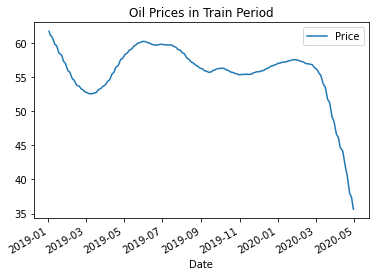

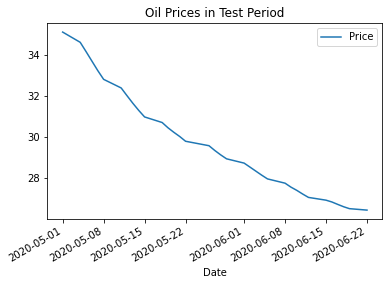

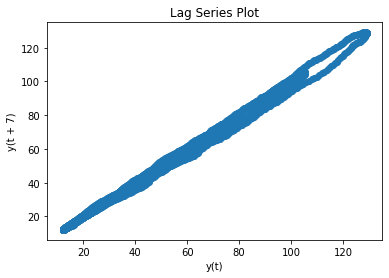

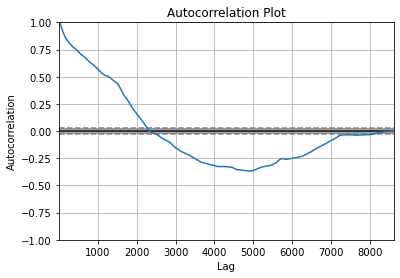

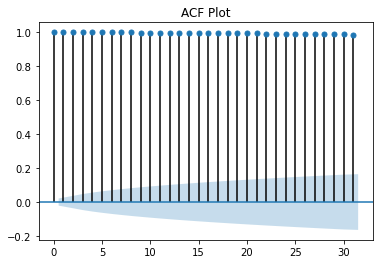

In [4]:
## Plotting Train Data
train.plot()
plt.title("Oil Prices in Train Period")
plt.show()
test.plot()
plt.title("Oil Prices in Test Period")
plt.legend()
plt.show()
lag_plot(data, lag=7)
plt.title("Lag Series Plot")
plt.show()
autocorrelation_plot(data)
plt.title("Autocorrelation Plot")
plt.show()
plot_acf(data, lags=31)
plt.title("ACF Plot")
plt.show()

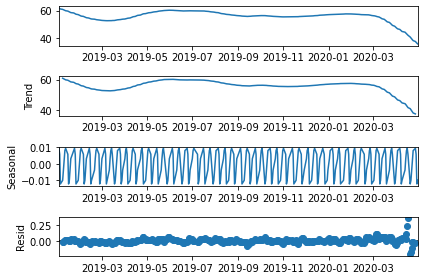

In [5]:
decomposition = sm.tsa.seasonal_decompose(train, model='addititve', period=7)
fig = decomposition.plot()
plt.show()

Running model and loading results in Output

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('

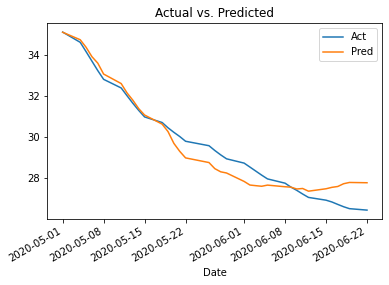

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE 0.610283044364627
         Date      Price
0  2020-05-01  35.099902
1  2020-05-04  34.735013
2  2020-05-05  34.369755
3  2020-05-06  33.910903
4  2020-05-07  33.596907
..        ...        ...
77 2020-08-17   0.000000
78 2020-08-18   0.000000
79 2020-08-19   0.000000
80 2020-08-20   0.000000
81 2020-08-21   0.000000

[82 rows x 2 columns]


In [6]:
#Creating Model using ARIMA
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(30, 1,5)).fit()
yhat = model.predict(train.shape[0], train.shape[0]+test.shape[0]-1  )
## yhat = model.predict(start="2020-04-01",end="2020-04-30")
res=pd.DataFrame({"Date":test.index,"Pred":yhat, "Act":test["Price"].values})
res.set_index("Date", inplace=True)
res["Act"].plot(label="Act")
res["Pred"].plot(label="Pred")
plt.title("Actual vs. Predicted")
plt.legend()
plt.show()
print("RMSE",math.sqrt(mean_squared_error(res[teststart:]["Act"], res[teststart:]["Pred"])))
#res.to_csv("/kaggle/working/res.csv")
Date1 = pd.date_range('2020-06-23', periods=60, freq='D')
#Create frame Test2 with future dates.  
columns = ['Date','Price']    
Test2 = pd.DataFrame(columns=columns)
Test2['Price'] = pd.to_numeric(Test2['Price'])
Test2["Date"] = pd.to_datetime(Date1)
Test2 = Test2.fillna(0)
#Remove Weekends as in source data and store data frame as Test1 results to be loaded in Test 1
Test1 = Test2[Test2["Date"].dt.weekday < 5]
Test1["Date"] = pd.to_datetime(Test1["Date"])
Test1['Price'] = pd.to_numeric(Test1['Price'])
df2 = pd.DataFrame([["2020-04-29",36.14],["2020-04-30",35.62]],columns=['Date','Price'])
df2 = df2.append(Test1,ignore_index=True)
df2["Date"] = pd.to_datetime(df2["Date"])
#print(df2)
res1 = pd.DataFrame({"Date":test.index,"Price":yhat})
res1["Date"] = pd.to_datetime(res1["Date"])
res1 = res1.append(df2,ignore_index=True)
print(res1)
res1.to_csv("/kaggle/working/submission_v1.csv",index=False)